In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-data-aims/test-dataset.xlsx


In [2]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Create output directory for saving plots
os.makedirs('/kaggle/working/plots', exist_ok=True)

# Step 1: Load the dataset
data = pd.read_excel('/kaggle/input/health-data-aims/test-dataset.xlsx')

In [3]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Unnamed: 0,household_id,total_income,union_name,user_id,profile_name,father_name,mother_name,birthday,age,...,RESULT_STAT_BMI,SUGAR,TAG_NAME,RESULT_STAT_SUGAR,PULSE_RATE,RESULT_STAT_PR,SPO2,RESULT_STAT_SPO2,MUAC,RESULT_STAT_MUAC
0,1,241175,Lower class,KOLA,988794,মো: সাগরহোসেন,0.0,0.0,2001-11-05 18:00:00,19,...,NaN,NaN,NaN,NaN,96.0,Normal,97.0,Normal,NaN,NaN
1,2,241176,Lower class,KOLA,988796,মোছা:তামান্না,0.0,0.0,2000-06-18 18:00:00,20,...,NaN,NaN,NaN,NaN,89.0,Normal,NaN,NaN,NaN,NaN
2,3,241179,Lower class,KOLA,988802,শুকুরুচন্দ্র,0.0,0.0,1978-06-04 18:00:00,42,...,NaN,NaN,NaN,NaN,69.0,Normal,NaN,NaN,NaN,NaN
3,4,241180,Lower class,KOLA,988807,দিপালীরাণী,0.0,0.0,1956-02-02 18:00:00,64,...,NaN,8.72,Random,Normal,85.0,Normal,NaN,NaN,NaN,NaN
4,5,241181,Lower class,KOLA,988809,বুলবুলি,0.0,0.0,1996-12-25 18:00:00,23,...,NaN,NaN,NaN,NaN,101.0,High,NaN,NaN,NaN,NaN


In [4]:
# Step 2: Basic EDA
print("\nDataset Info:")
print("=" * 50)
data.info()
print("\nNull Values per Column:")
print("=" * 50)
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  29999 non-null  int64  
 1   household_id                29999 non-null  int64  
 2   total_income                29999 non-null  object 
 3   union_name                  29999 non-null  object 
 4   user_id                     29999 non-null  int64  
 5   profile_name                29999 non-null  object 
 6   father_name                 25561 non-null  object 
 7   mother_name                 25547 non-null  object 
 8   birthday                    29999 non-null  object 
 9   age                         29999 non-null  int64  
 10  gender                      29999 non-null  object 
 11  is_poor                     29999 non-null  int64  
 12  is_freedom_fighter          29999 non-null  int64  
 13  had_stroke      

In [5]:
# Step 3: Preprocessing

# Drop specified columns
columns_to_drop = ['Unnamed: 0','birthday', 'father_name', 'mother_name', 'household_id', 'user_id', 'profile_name', 'HEIGHT', 'WEIGHT', 'BMI', 'RESULT_STAT_BMI', 'SUGAR', 'TAG_NAME', 'RESULT_STAT_SUGAR', 'SPO2','RESULT_STAT_SPO2', 'MUAC', 'RESULT_STAT_MUAC' ]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [6]:
# Drop columns with <10,000 non-null values
threshold = 10000
columns_to_keep = data.columns[data.notnull().sum() >= threshold]
data = data[columns_to_keep]

In [7]:
print("\nColumns after preprocessing:")
print("=" * 50)
print(data.columns.tolist())


Columns after preprocessing:
['total_income', 'union_name', 'age', 'gender', 'is_poor', 'is_freedom_fighter', 'had_stroke', 'has_cardiovascular_disease', 'disabilities_name', 'diabetic', 'profile_hypertensive', 'SYSTOLIC', 'DIASTOLIC', 'RESULT_STAT_BP', 'PULSE_RATE', 'RESULT_STAT_PR']


In [8]:
# Step 4: Identify categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'bool']
if 'RESULT_STAT_BP' in categorical_cols:
    categorical_cols.remove('RESULT_STAT_BP')
else:
    print("Warning: RESULT_STAT_BP not found or not categorical. Please check the dataset.")
    exit()

print("\nCategorical columns for Chi-square tests:")
print("=" * 50)
print(categorical_cols)


Categorical columns for Chi-square tests:
['total_income', 'union_name', 'gender', 'disabilities_name', 'diabetic', 'profile_hypertensive', 'RESULT_STAT_PR']


In [9]:
# Step 5: Chi-square tests
results = []
for feature in categorical_cols:
    # Create contingency table, dropping missing values
    valid_data = data[[feature, 'RESULT_STAT_BP']].dropna()
    if valid_data.empty:
        continue
    contingency_table = pd.crosstab(valid_data[feature], valid_data['RESULT_STAT_BP'])
    
    # Perform Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Format p-value
    if p < 0.0001:
        p_display = '< 0.0001'
    else:
        p_display = f'{p:.6f}'
    
    # Check assumption (expected frequencies >= 5)
    expected_min = expected.min()
    assumption_met = expected_min >= 5
    
    # Store results
    results.append({
        'Feature': feature,
        'Chi2_Statistic': chi2,
        'P_Value': p,
        'P_Display': p_display,
        'Degrees_of_Freedom': dof,
        'Assumption_Met': assumption_met,
        'Contingency_Table': contingency_table
    })

In [10]:
# Step 6: Display Chi-square results
print("\nChi-square Test Results for RESULT_STAT_BP:")
print("=" * 50)
for result in results:
    print(f"\nFeature: {result['Feature']}")
    print(f"Chi-square Statistic: {result['Chi2_Statistic']:.4f}")
    print(f"P-value: {result['P_Display']}")
    print(f"Degrees of Freedom: {result['Degrees_of_Freedom']}")
    print(f"Assumption Met (Expected Freq >= 5): {result['Assumption_Met']}")
    if result['P_Value'] < 0.05:
        print("Conclusion: Significant association (p < 0.05)")
        print("\nContingency Table:")
        print(result['Contingency_Table'])
    else:
        print("Conclusion: No significant association (p >= 0.05)")
    print("-" * 50)


Chi-square Test Results for RESULT_STAT_BP:

Feature: total_income
Chi-square Statistic: 159.2396
P-value: < 0.0001
Degrees of Freedom: 18
Assumption Met (Expected Freq >= 5): True
Conclusion: Significant association (p < 0.05)

Contingency Table:
RESULT_STAT_BP      High   Low  Mild High  Moderate High  Normal  \
total_income                                                       
Lower class          364  1826       2261           1003    7866   
Lower-middle class    48   261        371            151    1230   
Middle class         114   560        833            388    2165   
Upper class           19    57        109             56     229   

RESULT_STAT_BP      Prehypertension  Severe High  
total_income                                      
Lower class                    4362          392  
Lower-middle class              802           54  
Middle class                   1707          169  
Upper class                     188           15  
------------------------------------


Generating visualizations for significant features...


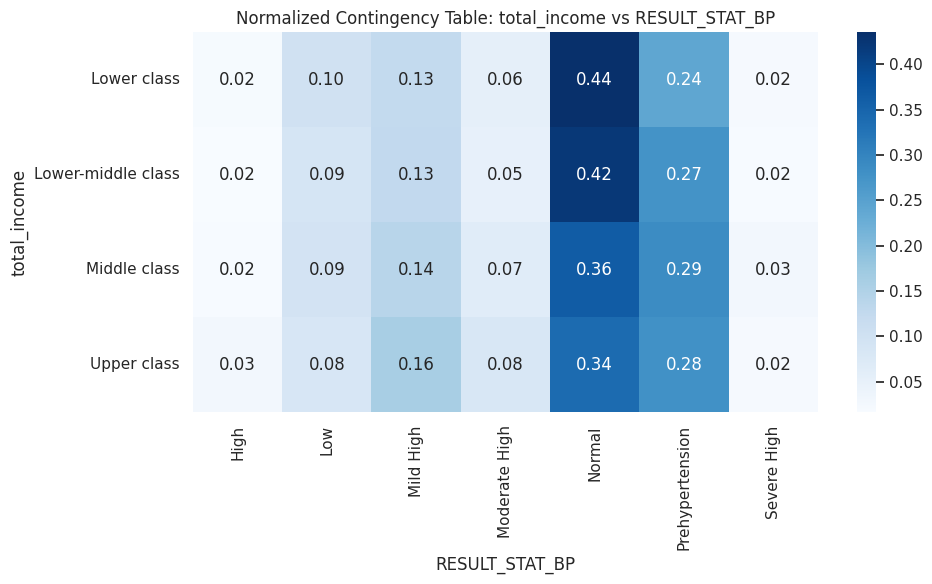

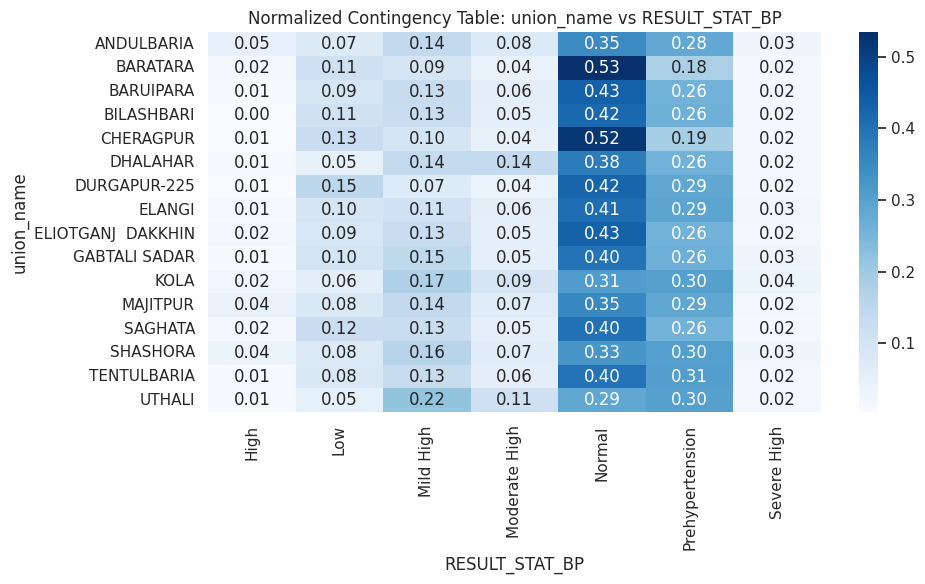

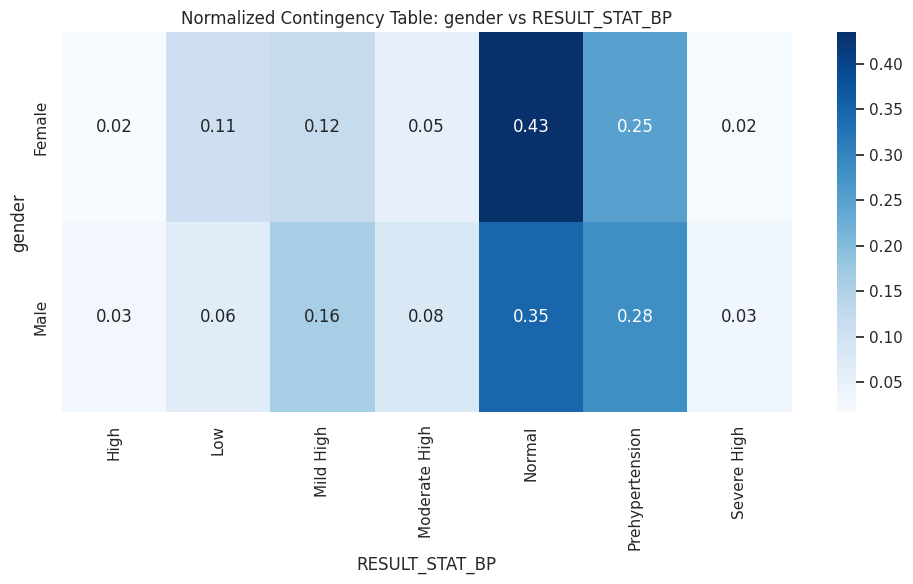

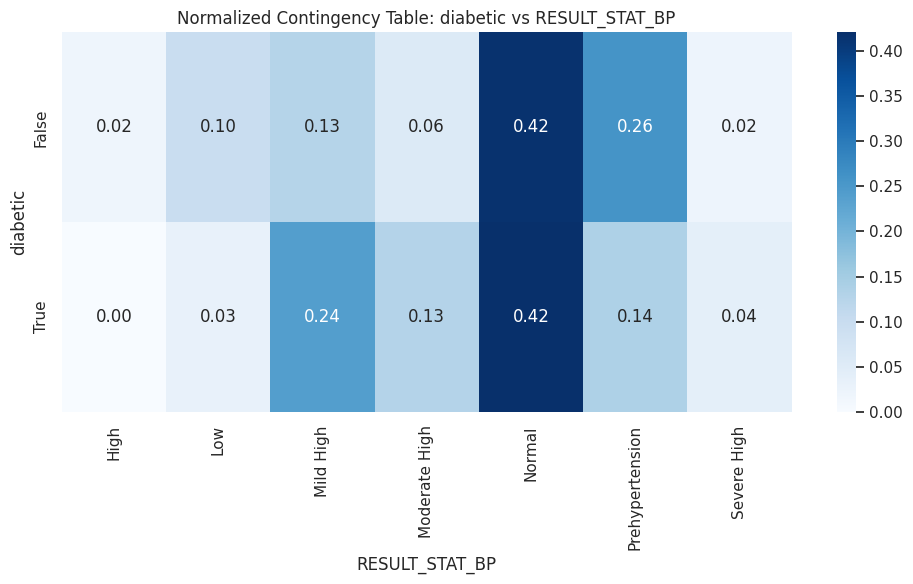

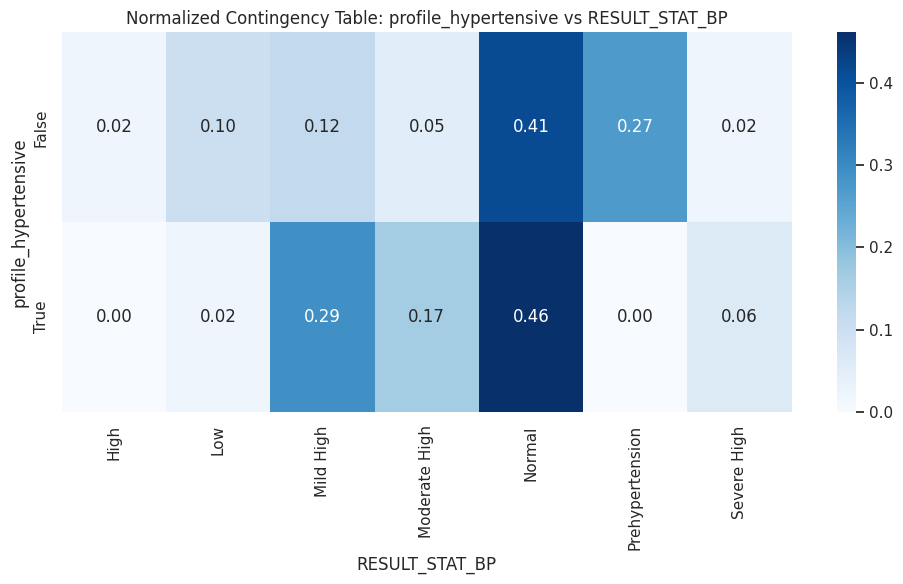

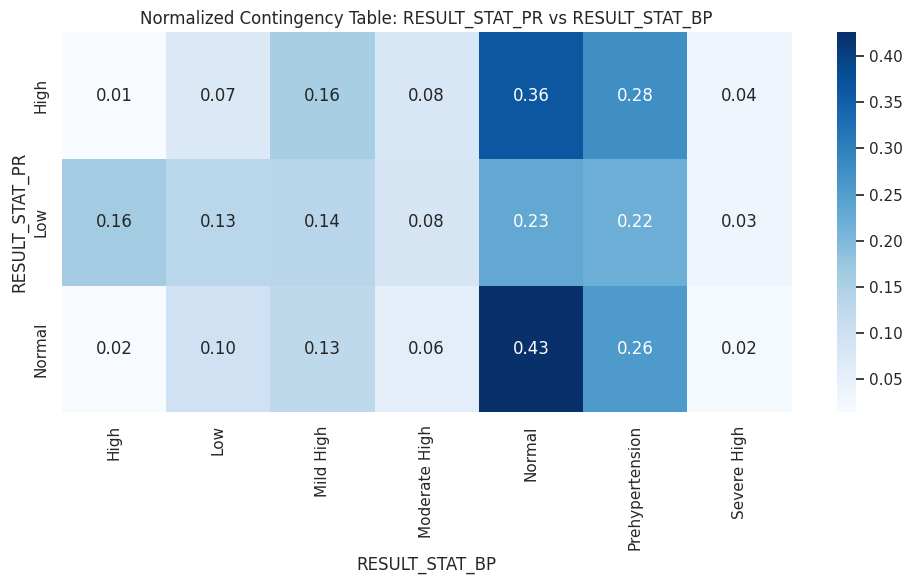

In [14]:
# Step 7: Visualizations for significant features
print("\nGenerating visualizations for significant features...")
for result in results:
    if result['P_Value'] < 0.05:
        feature = result['Feature']
        contingency_table = result['Contingency_Table']
        
        # Normalize contingency table by row (proportions)
        normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)
        
        # Plot heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(normalized_table, annot=True, cmap='Blues', fmt='.2f')
        plt.title(f'Normalized Contingency Table: {feature} vs RESULT_STAT_BP')
        plt.xlabel('RESULT_STAT_BP')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()
        
        # Save plot
        #plot_path = f'/kaggle/working/plots/heatmap_{feature}.png'
        #plt.savefig(plot_path)
        #plt.close()
        #print(f"Saved heatmap for {feature} at {plot_path}")

In [12]:
# Step 8: Identify strongly associated columns
significant_features = [r['Feature'] for r in results if r['P_Value'] < 0.05]
strong_features = [r['Feature'] for r in results if r['P_Value'] < 0.001]

print("\nSummary of Significant Features (p < 0.05):")
print("=" * 50)
if significant_features:
    for feature in significant_features:
        print(f"- {feature}")
else:
    print("No features found with significant association.")

print("\nStrongly Associated Features (p < 0.001):")
print("=" * 50)
if strong_features:
    for feature in strong_features:
        print(f"- {feature}")
else:
    print("No features found with strong association (p < 0.001).")


Summary of Significant Features (p < 0.05):
- total_income
- union_name
- gender
- diabetic
- profile_hypertensive
- RESULT_STAT_PR

Strongly Associated Features (p < 0.001):
- total_income
- union_name
- gender
- diabetic
- profile_hypertensive
- RESULT_STAT_PR


# Predictive Modeling Example
Here is **a predictive model** to identify individuals at risk of severe BP issues. 
profile_hypertensive, diabetic, RESULT_STAT_PR, total_income, union_name, and gender are all significantly associated with RESULT_STAT_BP.
We can use these features in a logistic regression or decision tree model to predict the likelihood of Severe High BP. 
**For example:**
Features: diabetic, profile_hypertensive, total_income, gender, RESULT_STAT_PR.
Target: Binary outcome (Severe High BP vs. Not Severe High).

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
data_encoded = data.copy()
for col in ['total_income', 'gender', 'diabetic', 'profile_hypertensive', 'RESULT_STAT_PR']:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
data_encoded['Severe_High'] = (data['RESULT_STAT_BP'] == 'Severe High').astype(int)

# Features and target
X = data_encoded[['total_income', 'gender', 'diabetic', 'profile_hypertensive', 'RESULT_STAT_PR']]
y = data_encoded['Severe_High']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Model accuracy:", model.score(X_test, y_test))
print("Coefficients:", dict(zip(X.columns, model.coef_[0])))

Model accuracy: 0.9775555555555555
Coefficients: {'total_income': 0.1046758530563918, 'gender': 0.5092467172527124, 'diabetic': -0.37339035064366616, 'profile_hypertensive': 1.210604574790165, 'RESULT_STAT_PR': -0.4448225799686554}
